<a href="https://colab.research.google.com/github/vxlwang/twitter_sentiment_stock_prediction/blob/main/twitter_sentiment_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install transformers
# !pip install matplotlib==3.4
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased")
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [2]:
twitter = pd.read_csv("/content/EA_tweets_cleaned.csv")

twitter.head()

,Date,Hour,cleaned_tweets,RTs,Followers,Following
0,2016-06-15,10:04,"#VR hardware is here, but robust game lineup i...",NaN,5172.0,515.0
1,2016-06-15,08:42,OVAS Pacific Biosciences of California Inc. Ex...,NaN,71.0,40.0
2,2016-06-15,08:19,"$EA Rf xcw€•£*cc. Ze,*$*3,r#43€•¢t,😠°==™©•√",NaN,6.0,6.0
3,2016-06-15,08:08,FXA CurrencyShares British Pound Sterling Trus...,NaN,86.0,40.0
4,2016-06-15,07:42,CBT Cabot Corp. Yield $CBT $EA $SQQQ $HXU.TO #...,NaN,58.0,40.0


In [3]:
def bert_score(text):
  tokens = tokenizer.encode(text, return_tensors="pt")
  result = model(tokens)
  return int(torch.argmax(result.logits))

In [4]:
twitter["Sentiment"] = twitter["cleaned_tweets"].apply(lambda x: bert_score(x))

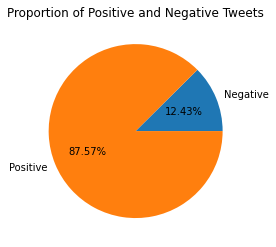

In [17]:
twitter["Sentiment"] = twitter["Sentiment"].replace({0: "Negative", 1: "Positive"})
twitter.groupby("Sentiment").size().plot(kind="pie", autopct='%.2f%%')

plt.title("Proportion of Positive and Negative Tweets")
plt.ylabel("")
plt.savefig("/content/BERT_pie.jpg")

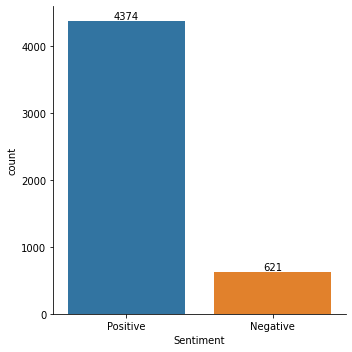

In [18]:
sentiment_counts = twitter["Sentiment"].value_counts()

graph = sns.catplot(x="Sentiment", kind="count", data=twitter)
ax = graph.facet_axis(0,0)

for container in ax.containers:
    labels = [f"{(height.get_height())}" for height in container]
    ax.bar_label(container, labels=labels, label_type="edge")

In [ ]:
twitter.to_csv("/content/EA_tweets_BERT.csv", index=False)